In [77]:
import torch
from torch.nn import MSELoss, Sequential, Linear, Sigmoid, Tanh, L1Loss, Module, Parameter, NLLLoss
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from scipy.optimize import minimize_scalar
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt 
import math
from sklearn.metrics import log_loss
from numpy.random import default_rng
import re
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [78]:
f = open("Lecture2/spam.train.txt", "r")
txt = f.read()
sp = re.split(r'[\n]', txt)
li = list(map(lambda x:re.split(r'[ \n]', x), sp ))
li = li[:-1]
doto = list()
for a in li:
    for t in a:
        doto.append(float(t))
doto2 = np.array(doto).reshape(len(li), -1)

In [79]:
f = open("Lecture2/spam.test.txt", "r")
txt = f.read()
sp = re.split(r'[\n]', txt)
li = list(map(lambda x:re.split(r'[ \n]', x), sp ))
li = li[:-1]
doto = list()
for a in li:
    for t in a:
        doto.append(float(t))
dototest = np.array(doto).reshape(len(li), -1)

torch.Size([7093, 102])
torch.Size([7093])


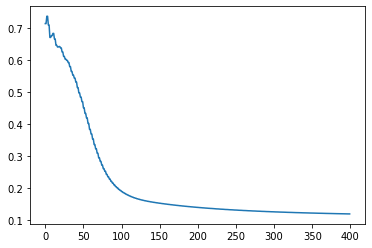

In [80]:

network = Sequential(Linear(102, 50), Sigmoid(),
          Linear(50, 2),  torch.nn.LogSoftmax())
Loss = NLLLoss()
learning_rate = 0.01
X_train = torch.from_numpy(doto2[:,1::]).float()
print(X_train.size())
y_train = torch.from_numpy(doto2[:,0].reshape(-1,1)).long().squeeze()
print(y_train.size())

optimizer = torch.optim.Adam(network.parameters(), lr=learning_rate)
losses = []
for i in range(200):
    network.zero_grad()
    res = network(X_train)
    los_val = Loss(res, y_train)
    losses.append(los_val)
    los_val.backward()
    optimizer.step()

    losses.append(los_val)
plt.plot(losses)

In [81]:
X_train = doto2[:,1::]
y_train = doto2[:,0].reshape(-1,1)
X_test = dototest[:,1::]
y_test = dototest[:,0].reshape(-1,1)

In [82]:
network_res = f1_score(np.argmax(network(torch.from_numpy(doto2[:,1::]).float()).detach().numpy(), axis = 1), y_train)

In [83]:
svm = SVC()
svm.fit(X_train, y_train)
svm_res = f1_score(svm.predict(X_test),y_test)

In [84]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_res = f1_score(logreg.predict(X_test),y_test)

In [85]:
svm_res

0.9585241566148487

In [86]:
network_res

0.9605517909002904

In [87]:
logreg_res

0.935693215339233

In [88]:
def plot_graphic(estimator_class, name, X_train, y_train, X_test, y_test):
    losses = []
    fig = plt.figure(figsize= (14,5))
    ax = fig.add_subplot(111)
    for i in range(50, 760, 100):
        if name != 'RF':
            estimator = estimator_class(n_estimators = i, learning_rate = 0.01)
        else:
            estimator = estimator_class(n_estimators = i) 
        estimator.fit(X_train, y_train)
        losses.append(f1_score(estimator.predict(X_test), y_test))
    ax.set_ylabel('Score')
    ax.set_xlabel('Estimator number')
    ax.set_title(name)
    ax.plot(range(50, 760, 100), losses)

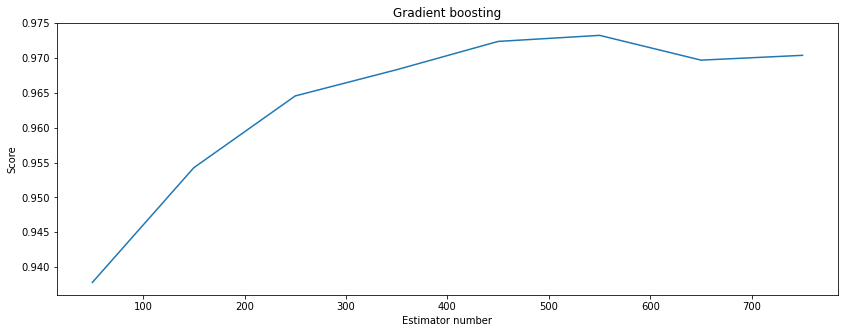

In [89]:
plot_graphic(GradientBoostingClassifier, 'Gradient boosting', X_train, y_train, X_test, y_test)

In [90]:
estimator = GradientBoostingClassifier(n_estimators = 550)
estimator.fit(X_train, y_train)
boost_score = f1_score(estimator.predict(X_test), y_test)

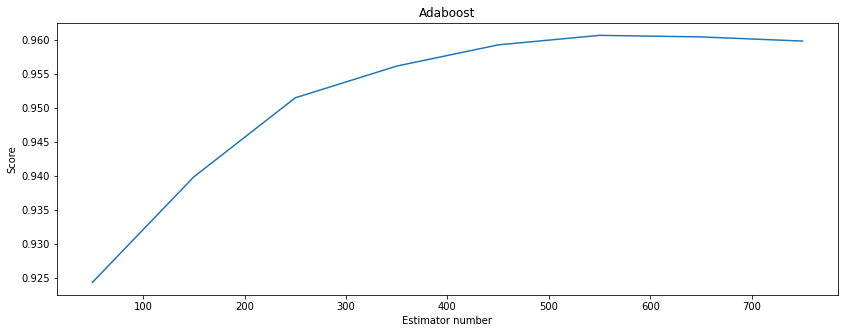

In [91]:
plot_graphic(AdaBoostClassifier, 'Adaboost', X_train, y_train, X_test, y_test)

In [92]:
estimator = AdaBoostClassifier(n_estimators = 550, learning_rate = 0.01)
estimator.fit(X_train, y_train)
ada_score = f1_score(estimator.predict(X_test), y_test)

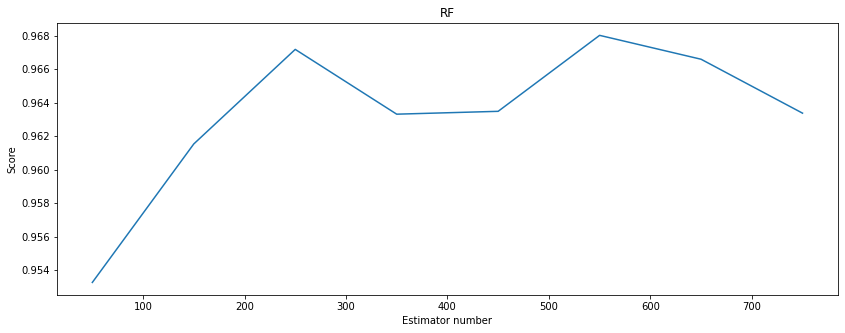

In [93]:
plot_graphic(RandomForestClassifier, 'RF', X_train, y_train, X_test, y_test)

In [94]:
estimator = RandomForestClassifier(n_estimators = 600)
estimator.fit(X_train, y_train)
rf_score = f1_score(estimator.predict(X_test), y_test)

In [95]:
import xgboost as xgb

In [96]:
import catboost as yan

In [97]:
import lightgbm as lgb

In [123]:
import numpy as np

In [98]:
def plot_graphic1(estimator_class, params,name, X_train, y_train, X_test, y_test):
    losses = []
    fig = plt.figure(figsize= (14,5))
    ax = fig.add_subplot(111)
    for i in range(50, 760, 100):
        params['n_estimators'] = i
        estimator = estimator_class(**params) 
        estimator.fit(X_train, y_train)
        losses.append(f1_score(estimator.predict(X_test), y_test))
    ax.set_ylabel('Score')
    ax.set_xlabel('Estimator number')
    ax.set_title(name)
    ax.plot(range(50, 760, 100), losses)

In [113]:
def plot_graphic2(estimator_class, params,name, X_train, y_train, X_test, y_test):
    losses = []
    fig = plt.figure(figsize= (14,5))
    ax = fig.add_subplot(111)
    for i in range(1, 10, 2):
        params['max_depth'] = i
        estimator = estimator_class(**params) 
        estimator.fit(X_train, y_train)
        losses.append(f1_score(estimator.predict(X_test), y_test))
    ax.set_ylabel('Score')
    ax.set_xlabel('Depth')
    ax.set_title(name)
    ax.plot( range(1, 10, 2), losses)

In [126]:
def plot_graphic3(estimator_class, params,name, X_train, y_train, X_test, y_test):
    losses = []
    fig = plt.figure(figsize= (14,5))
    ax = fig.add_subplot(111)
    for i in np.arange(0.01, 0.5, 0.05):
        params['learning_rate'] = i
        estimator = estimator_class(**params) 
        estimator.fit(X_train, y_train)
        losses.append(f1_score(estimator.predict(X_test), y_test))
    ax.set_ylabel('Score')
    ax.set_xlabel('Learning_rate')
    ax.set_title(name)
    ax.plot(np.arange(0.01, 0.5, 0.05), losses)

In [147]:
param = {
         'max_depth': 5, 'learning_rate': 0.1,
         'logging_level' : 'Silent'
         }

In [134]:
param2 = {
         'max_depth': 5, 'learning_rate': 0.1,
         'num_leaves':2**5
         }

In [100]:
param1 = {'booster': 'dart',
         'max_depth': 5, 'learning_rate': 0.1,
         'objective': 'binary:logistic',
         'sample_type': 'uniform',
         'normalize_type': 'tree',
         'rate_drop': 0.1,
         'skip_drop': 0.5}

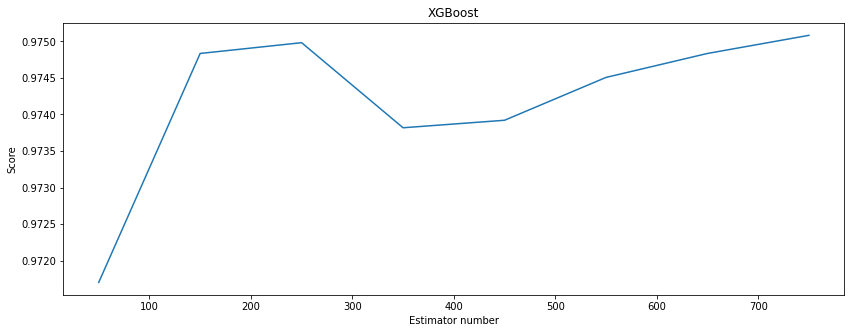

In [101]:
plot_graphic1(xgb.XGBClassifier, param, 'XGBoost', X_train, y_train, X_test, y_test)

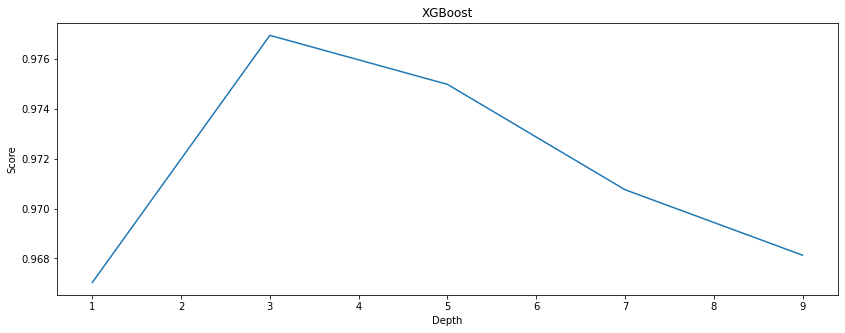

In [116]:
plot_graphic2(xgb.XGBClassifier, param, 'XGBoost', X_train, y_train, X_test, y_test)

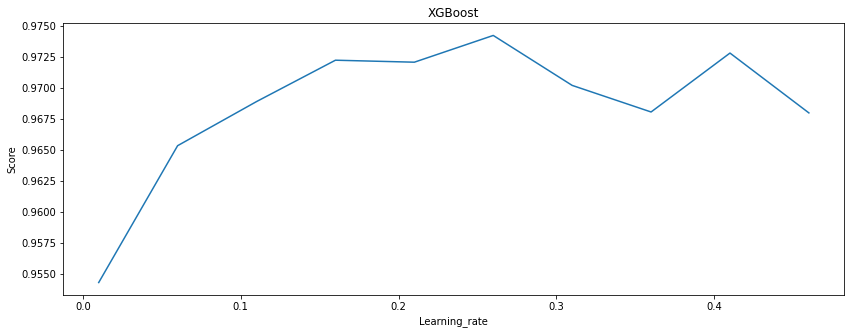

In [127]:
plot_graphic3(xgb.XGBClassifier, param, 'XGBoost', X_train, y_train, X_test, y_test)

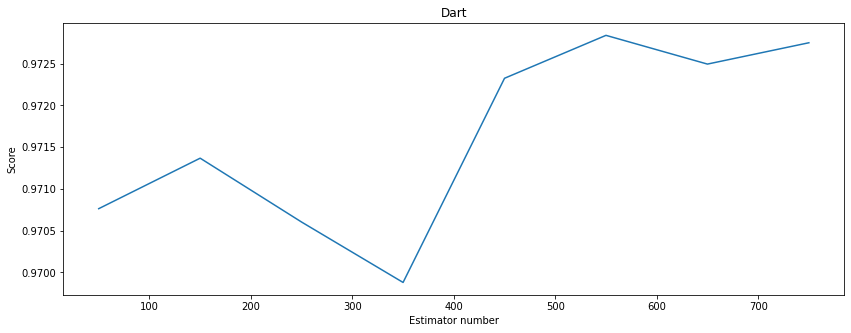

In [102]:
plot_graphic1(xgb.XGBClassifier,param1, 'Dart', X_train, y_train, X_test, y_test)

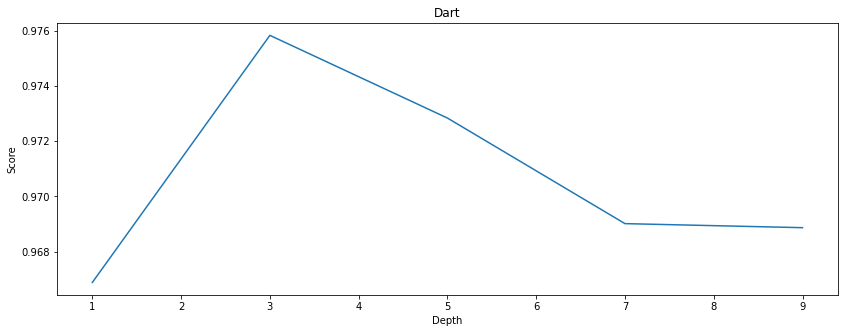

In [128]:
plot_graphic2(xgb.XGBClassifier,param1, 'Dart', X_train, y_train, X_test, y_test)

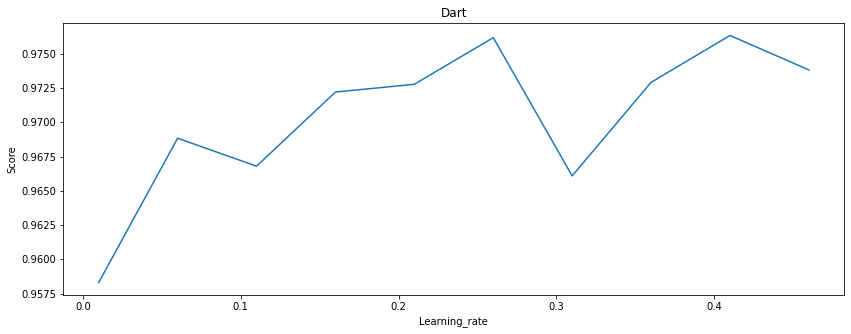

In [129]:
plot_graphic3(xgb.XGBClassifier,param1, 'Dart', X_train, y_train, X_test, y_test)

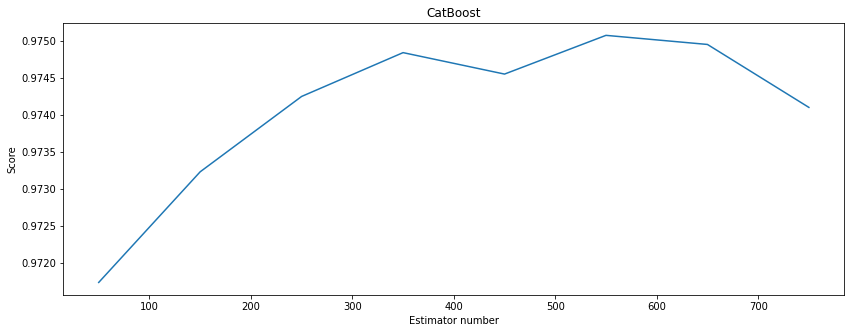

In [148]:
plot_graphic1(yan.CatBoostClassifier,param, 'CatBoost', X_train, y_train, X_test, y_test)

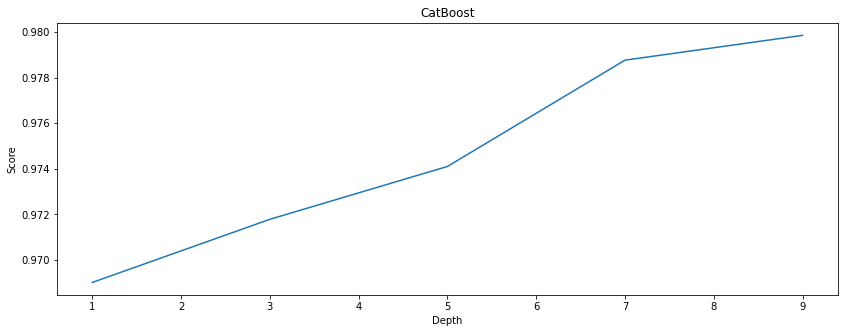

In [149]:
plot_graphic2(yan.CatBoostClassifier,param, 'CatBoost', X_train, y_train, X_test, y_test)

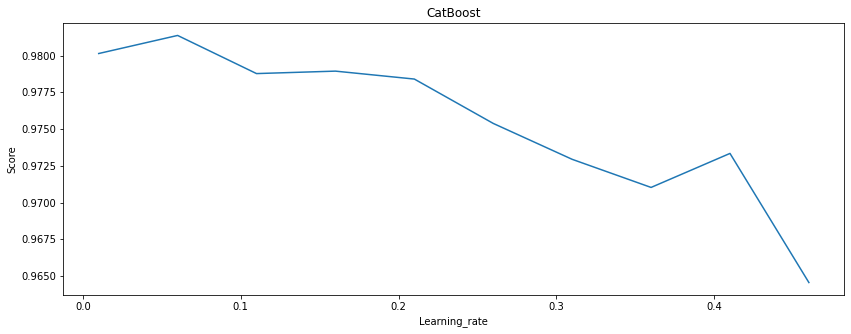

In [150]:
plot_graphic3(yan.CatBoostClassifier,param, 'CatBoost', X_train, y_train, X_test, y_test)

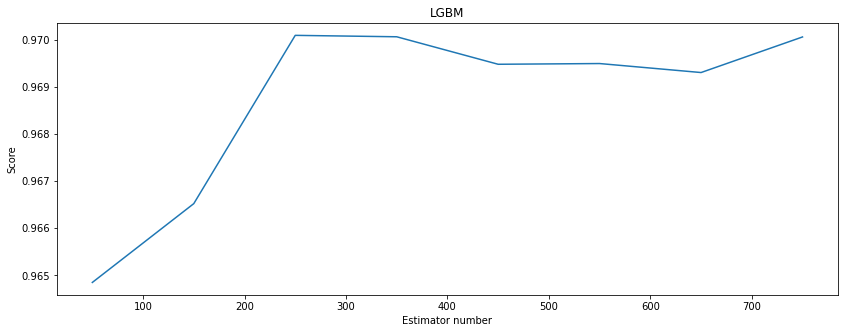

In [136]:
plot_graphic1(lgb.LGBMClassifier,param2, 'LGBM', X_train, y_train, X_test, y_test)

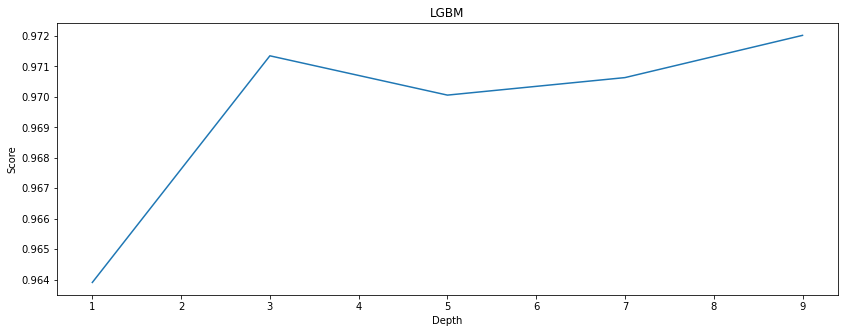

In [137]:
plot_graphic2(lgb.LGBMClassifier,param2, 'LGBM', X_train, y_train, X_test, y_test)

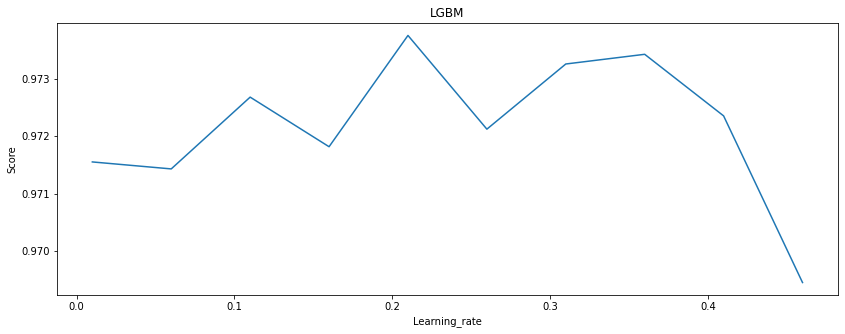

In [139]:
plot_graphic3(lgb.LGBMClassifier,param2, 'LGBM', X_train, y_train, X_test, y_test)

In [140]:
param['n_estimators'] = 750
param['max_depth'] = 3
param['learning_rate'] = 0.25

estimator = xgb.XGBClassifier(**param) 
estimator.fit(X_train, y_train)
xgbres = f1_score(estimator.predict(X_test), y_test)

In [141]:
param1['n_estimators'] = 750
param1['max_depth'] = 3
param1['learning_rate'] = 0.45

estimator = xgb.XGBClassifier(**param1) 
estimator.fit(X_train, y_train)
dartres = f1_score(estimator.predict(X_test), y_test)

In [152]:
param['n_estimators'] = 550
param['max_depth'] = 9
param['learning_rate'] = 0.05
estimator = yan.CatBoostClassifier(**param) 
estimator.fit(X_train, y_train)
catres = f1_score(estimator.predict(X_test), y_test)

In [143]:
param2['n_estimators'] = 750
param2['max_depth'] = 9
param2['learning_rate'] = 0.2
estimator = lgb.LGBMClassifier(**param) 
estimator.fit(X_train, y_train)
lgbres = f1_score(estimator.predict(X_test), y_test)

In [144]:
print('Neural netowork score: ', network_res)
print('SVM score: ', svm_res)
print('Log reg score: ',logreg_res)
print('Boosting score: ', boost_score)
print('Adaboost score: ',ada_score)
print('Ranfom forest score: ',rf_score)


Neural netowork score:  0.9605517909002904
SVM score:  0.9585241566148487
Log reg score:  0.935693215339233
Boosting score:  0.9728209934395501
Adaboost score:  0.960674839179512
Ranfom forest score:  0.9643517632804031


In [153]:
print('xgboost score: ', xgbres)
print('DART score: ', dartres)
print('catboost score: ',catres)
print('lightgbm score: ', lgbres)



xgboost score:  0.9744266415331448
DART score:  0.9741465863453815
catboost score:  0.9799366420274551
lightgbm score:  0.9740964983459209


Из всех бустингов катбуст показал лучший результат. Вообще, самый выскокий скор у SVM, видимо, данные хорошо разделяются.